In [11]:
import numpy as np 
import pandas as pd 
from datetime import timedelta # сама добавила
import matplotlib.pyplot as plt
import seaborn as sns

Датасет - `bus_table.csv`
- `data` - дата
- `route` - название маршрута автобуса
- `direction` - направление маршрута
- `scheduled` - время прибыттия по расписанию
- `actual` - фактическое время прибытия

## Задание 1
Прочитайте файл, сохранив результаты в `df`. Посмотрите статистики и инфо.

In [12]:
df = pd.read_csv('bus_table.csv')
display(df.describe())
display(df.info())
df.head()

,data,route,direction,scheduled,actual
count,39157,39157,39157,38917,39157
unique,63,3,2,1356,27633
top,2016-04-14,A,north,23:00:25,08:08:24
freq,693,13358,19686,64,8


<class 'pandas.core.frame.DataFrame'>
Index: 39157 entries, 0 to 39156
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       39157 non-null  object
 1   route      39157 non-null  object
 2   direction  39157 non-null  object
 3   scheduled  38917 non-null  object
 4   actual     39157 non-null  object
dtypes: object(5)
memory usage: 1.8+ MB


None

,data,route,direction,scheduled,actual
0,2016-03-26,A,south,01:11:57,01:13:19
1,2016-03-26,A,south,23:19:57,23:16:13
2,2016-03-26,A,south,21:19:57,21:18:46
3,2016-03-26,A,south,19:04:57,19:01:49
4,2016-03-26,A,south,16:42:57,16:42:39


In [13]:
# проверили на дубликаты и вывели повторяющиеся строки
df[df.duplicated()]

,data,route,direction,scheduled,actual
13755,2016-04-16,C,south,11:47:59,11:45:13
13768,2016-04-16,C,south,18:01:59,18:03:59
13772,2016-04-16,C,south,10:32:59,10:27:58
28556,2016-04-16,A,north,15:15:28,15:15:33
28558,2016-04-16,A,north,12:51:28,12:50:12
33376,2016-04-16,C,north,12:32:11,12:32:50
33378,2016-04-16,C,north,09:56:10,09:55:46
33380,2016-04-16,C,north,07:41:10,07:40:27
33389,2016-04-16,C,north,18:38:11,18:38:00
33391,2016-04-16,C,north,16:08:11,16:04:34


In [14]:
#  Удалим дубликаты, так они будут нам явно портить стастику и заново просмотрим статистику и инфо
df=df.drop_duplicates(ignore_index=True)  
display(df.describe())
display(df.info())

,data,route,direction,scheduled,actual
count,39145,39145,39145,38905,39145
unique,63,3,2,1356,27633
top,2016-04-14,A,north,23:00:25,08:08:24
freq,693,13356,19677,64,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39145 entries, 0 to 39144
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       39145 non-null  object
 1   route      39145 non-null  object
 2   direction  39145 non-null  object
 3   scheduled  38905 non-null  object
 4   actual     39145 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


None

In [ ]:
### тут у меня вроде ок (### - на лекции шилин разбирает)

## Задание 2
Вырежте пропушеные данные (сохраните их в DataFrame `df_null`, они вам еще понадобятся) и удалите их из `df`. Выведите размерность `df_null`.

In [15]:
df_null = df[df.isna().any(axis=1)]
df = df.dropna(ignore_index=True)
print(df_null.shape)


(240, 5)


## Задание 3
1. Добавьте столбец `table` дату/время прибытия автобусов по расписанию на остановку. 
2. Добавьте столбец `arrival` дату/временя актуального прибытия автобуса на остановку.


In [16]:
#1
df['table'] =df['data']+'/'+df['scheduled']
df['table']=pd.to_datetime(df['table'])

In [17]:
#2
df['arrival'] = df['data']+'/'+df['actual']
df['arrival']=pd.to_datetime(df['arrival'])
df.head()

,data,route,direction,scheduled,actual,table,arrival
0,2016-03-26,A,south,01:11:57,01:13:19,2016-03-26 01:11:57,2016-03-26 01:13:19
1,2016-03-26,A,south,23:19:57,23:16:13,2016-03-26 23:19:57,2016-03-26 23:16:13
2,2016-03-26,A,south,21:19:57,21:18:46,2016-03-26 21:19:57,2016-03-26 21:18:46
3,2016-03-26,A,south,19:04:57,19:01:49,2016-03-26 19:04:57,2016-03-26 19:01:49
4,2016-03-26,A,south,16:42:57,16:42:39,2016-03-26 16:42:57,2016-03-26 16:42:39


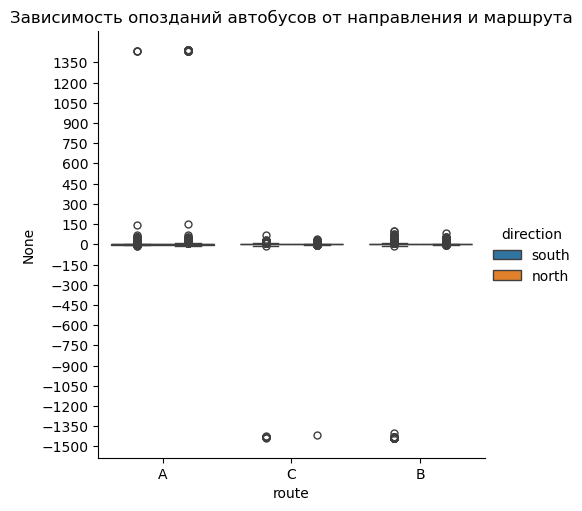

In [18]:
# сейчас буду латать код. Помимо дубликатов, в коде есть также момент с опозданием в виде 23 часов например, то есть если автобус должен был прибыть в 23:50, а прибыл в 00:10, то дата прибытия должна поменяться, а в арривал она не меняется сейчас
# интервал ниже я выбрала, так как посмотрела на следующий график (на данный момент он изображен неаккуратно, однако уже можно сделать вывод,)
s_f = lambda x: (x.days)*24*60 + (x.seconds)/60  # данная функция далее используется для 4 задания

sns.catplot(data=df,x='route',hue='direction',y=(df['arrival']-df['table']).map(s_f),kind='box').set(title='Зависимость опозданий автобусов от направления и маршрута')
plt.yticks(np.arange(-1500,1500, step=150))

plt.show()

И хотя график не является аккуратным и черновым, уже можно сделать вывод о том, что исключая выше описанные ситуации, остальные максимальные выбросы соответствуют опозданиям немного больше , чем 150. Отсюда, я беру интервал с разницей от 21:00 до 03:00 

In [19]:

change= lambda x: x.hour
df['arrival']=np.where((df['table'].apply(change)>=21) & (df['arrival'].apply(change)<=3) ,df['arrival']+timedelta(1),df['arrival'])
df['arrival']=np.where((df['table'].apply(change)<=3) & (df['arrival'].apply(change)>=21) ,df['arrival']-timedelta(1),df['arrival'])

display(df.describe())
display(df.info())
df.head()
# он там по 20*60 сравнивал таймдельту 

,table,arrival
count,38905,38905
mean,2016-04-26 18:33:07.926179328,2016-04-26 18:34:36.829456384
min,2016-03-26 00:00:25,2016-03-26 00:05:01
25%,2016-04-11 07:18:59,2016-04-11 07:20:17
50%,2016-04-26 17:12:29,2016-04-26 17:14:37
75%,2016-05-12 13:02:27,2016-05-12 13:01:53
max,2016-05-27 23:59:58,2016-05-28 00:01:28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38905 entries, 0 to 38904
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   data       38905 non-null  object        
 1   route      38905 non-null  object        
 2   direction  38905 non-null  object        
 3   scheduled  38905 non-null  object        
 4   actual     38905 non-null  object        
 5   table      38905 non-null  datetime64[ns]
 6   arrival    38905 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(5)
memory usage: 2.1+ MB


None

,data,route,direction,scheduled,actual,table,arrival
0,2016-03-26,A,south,01:11:57,01:13:19,2016-03-26 01:11:57,2016-03-26 01:13:19
1,2016-03-26,A,south,23:19:57,23:16:13,2016-03-26 23:19:57,2016-03-26 23:16:13
2,2016-03-26,A,south,21:19:57,21:18:46,2016-03-26 21:19:57,2016-03-26 21:18:46
3,2016-03-26,A,south,19:04:57,19:01:49,2016-03-26 19:04:57,2016-03-26 19:01:49
4,2016-03-26,A,south,16:42:57,16:42:39,2016-03-26 16:42:57,2016-03-26 16:42:39


## Задание 4
1. Найдите три самых часто встречаюшихся в расписании автобусов временных интервалов (естественно для каждой возможной пары номер маршрута-направление).

2. Добавьте в таблицу столбик `inteval` - интервал по расписаню между автобусами (естественно одного маршрута и направления) в МИНУТАХ.

3. Добавьте в таблицу столбик `arr_inteval` - интервал по фактическому между автобусами (естественно одного маршрута и направления) в МИНУТАХ.

In [10]:
#2, 1 вариант
ph=df.copy()
ph=ph.sort_values(['route','direction','table'],ignore_index=True)
ph['inteval'] = ph['table']-ph['table'].shift(1) 
s_f = lambda x: (x.days)*24*60 + (x.seconds)/60
ph['inteval'] = ph['inteval'].map(s_f)
# для А норф не делаю, так как уже есть
#нашли индекс строк там, где в собираемом столбце должен стоять нан (первый элемент в .loc) и заменили в df элемент на нужное значение
ph.loc[ph.query('route=="A" & direction=="south"').index[0],'inteval'] = np.nan
ph.loc[ph.query('route=="B" & direction=="north"').index[0],'inteval'] = np.nan
ph.loc[ph.query('route=="B" & direction=="south"').index[0],'inteval'] = np.nan
ph.loc[ph.query('route=="C" & direction=="north"').index[0],'inteval'] = np.nan
ph.loc[ph.query('route=="C" & direction=="south"').index[0],'inteval'] = np.nan

ph

,data,route,direction,scheduled,actual,table,arrival,inteval
0,2016-03-26,A,north,00:00:25,00:05:01,2016-03-26 00:00:25,2016-03-26 00:05:01,NaN
1,2016-03-26,A,north,00:30:25,00:30:19,2016-03-26 00:30:25,2016-03-26 00:30:19,30.00
2,2016-03-26,A,north,01:05:25,01:10:15,2016-03-26 01:05:25,2016-03-26 01:10:15,35.00
3,2016-03-26,A,north,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10,65.00
4,2016-03-26,A,north,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49,195.05
...,...,...,...,...,...,...,...,...
38900,2016-05-27,C,south,22:33:59,22:38:37,2016-05-27 22:33:59,2016-05-27 22:38:37,13.00
38901,2016-05-27,C,south,22:48:59,22:48:23,2016-05-27 22:48:59,2016-05-27 22:48:23,15.00
38902,2016-05-27,C,south,23:03:59,23:05:18,2016-05-27 23:03:59,2016-05-27 23:05:18,15.00
38903,2016-05-27,C,south,23:23:59,23:29:38,2016-05-27 23:23:59,2016-05-27 23:29:38,20.00


In [20]:
#2 , 2 вариант

s_f = lambda x: (x.days)*24*60 + (x.seconds)/60 
df=df.groupby(by=['route','direction']).apply(lambda x: x.sort_values('table',ignore_index=True)).reset_index(drop=True)
df['inteval']=df['table']
inteval = df.groupby(by=['route','direction'])['inteval'].shift(1).reset_index()
df['inteval']=(df['table']-inteval['inteval']).map(s_f)
df.query('route=="B" & direction=="north"')
df
#когда подставляла то, что он хочет, ругался. Вы сказали, что пока эту ошибку можно игнорировать, так что решила оставить. 1 вариант костыльный ,этот вроде нет

C:\Users\Larisa\AppData\Local\Temp\ipykernel_3992\4264103332.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df=df.groupby(by=['route','direction']).apply(lambda x: x.sort_values('table',ignore_index=True)).reset_index(drop=True)


,data,route,direction,scheduled,actual,table,arrival,inteval
0,2016-03-26,A,north,00:00:25,00:05:01,2016-03-26 00:00:25,2016-03-26 00:05:01,NaN
1,2016-03-26,A,north,00:30:25,00:30:19,2016-03-26 00:30:25,2016-03-26 00:30:19,30.00
2,2016-03-26,A,north,01:05:25,01:10:15,2016-03-26 01:05:25,2016-03-26 01:10:15,35.00
3,2016-03-26,A,north,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10,65.00
4,2016-03-26,A,north,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49,195.05
...,...,...,...,...,...,...,...,...
38900,2016-05-27,C,south,22:33:59,22:38:37,2016-05-27 22:33:59,2016-05-27 22:38:37,13.00
38901,2016-05-27,C,south,22:48:59,22:48:23,2016-05-27 22:48:59,2016-05-27 22:48:23,15.00
38902,2016-05-27,C,south,23:03:59,23:05:18,2016-05-27 23:03:59,2016-05-27 23:05:18,15.00
38903,2016-05-27,C,south,23:23:59,23:29:38,2016-05-27 23:23:59,2016-05-27 23:29:38,20.00


In [21]:
#1
f=lambda x: x.value_counts().nlargest(3)
df.groupby(['route','direction'])['inteval'].apply(f).reset_index().rename(columns={'level_2':'inteval', 'inteval':'count'}).set_index(['route','direction','inteval'])  

count
route direction inteval       
A     north     12.0      1434
                15.0      1377
                7.0        756
      south     15.0      1453
                12.0      1312
                8.0        710
B     north     15.0      1507
                12.0      1413
                8.0       1141
      south     15.0      1391
                12.0      1300
                8.0       1159
C     north     10.0      1869
                15.0       590
                6.0        552
      south     10.0      1342
                12.0      1087
                15.0      1049

In [528]:
#3 , 1 вариант
ph=ph.sort_values(['route','direction','arrival'],ignore_index=True)
ph['arr_inteval'] = ph['arrival']-ph['arrival'].shift(1) 
ph['arr_inteval'] = ph['arr_inteval'].map(s_f)
#нашли индекс строк там, где в собираемом столбце должен стоять нан (первый элемент в .loc) и заменили в df элемент на нужное значение
# для А норф не делаю, так как уже есть
ph.loc[ph.query('route=="A" & direction=="south"').index[0],'arr_inteval'] = np.nan
ph.loc[ph.query('route=="B" & direction=="north"').index[0],'arr_inteval'] = np.nan
ph.loc[ph.query('route=="B" & direction=="south"').index[0],'arr_inteval'] = np.nan
ph.loc[ph.query('route=="C" & direction=="north"').index[0],'arr_inteval'] = np.nan
ph.loc[ph.query('route=="C" & direction=="south"').index[0],'arr_inteval'] = np.nan
ph

,data,route,direction,scheduled,actual,table,arrival,inteval,arr_inteval
0,2016-03-26,A,north,00:00:25,00:05:01,2016-03-26 00:00:25,2016-03-26 00:05:01,NaN,NaN
1,2016-03-26,A,north,00:30:25,00:30:19,2016-03-26 00:30:25,2016-03-26 00:30:19,30.00,25.300000
2,2016-03-26,A,north,01:05:25,01:10:15,2016-03-26 01:05:25,2016-03-26 01:10:15,35.00,39.933333
3,2016-03-26,A,north,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10,65.00,68.916667
4,2016-03-26,A,north,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49,195.05,185.650000
...,...,...,...,...,...,...,...,...,...
38900,2016-05-27,C,south,22:33:59,22:38:37,2016-05-27 22:33:59,2016-05-27 22:38:37,13.00,15.550000
38901,2016-05-27,C,south,22:48:59,22:48:23,2016-05-27 22:48:59,2016-05-27 22:48:23,15.00,9.766667
38902,2016-05-27,C,south,23:03:59,23:05:18,2016-05-27 23:03:59,2016-05-27 23:05:18,15.00,16.916667
38903,2016-05-27,C,south,23:23:59,23:29:38,2016-05-27 23:23:59,2016-05-27 23:29:38,20.00,24.333333


In [22]:
#3, 2 вариант

s_f = lambda x: (x.days)*24*60 + (x.seconds)/60 
df=df.groupby(by=['route','direction']).apply(lambda x: x.sort_values('arrival',ignore_index=True)).reset_index(drop=True)
df['arr_inteval']=df['arrival']
arr_inteval = df.groupby(by=['route','direction'])['arr_inteval'].shift(1).reset_index()
df['arr_inteval']=(df['arrival']-arr_inteval['arr_inteval']).map(s_f)

df

C:\Users\Larisa\AppData\Local\Temp\ipykernel_3992\2896039787.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df=df.groupby(by=['route','direction']).apply(lambda x: x.sort_values('arrival',ignore_index=True)).reset_index(drop=True)


,data,route,direction,scheduled,actual,table,arrival,inteval,arr_inteval
0,2016-03-26,A,north,00:00:25,00:05:01,2016-03-26 00:00:25,2016-03-26 00:05:01,NaN,NaN
1,2016-03-26,A,north,00:30:25,00:30:19,2016-03-26 00:30:25,2016-03-26 00:30:19,30.00,25.300000
2,2016-03-26,A,north,01:05:25,01:10:15,2016-03-26 01:05:25,2016-03-26 01:10:15,35.00,39.933333
3,2016-03-26,A,north,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10,65.00,68.916667
4,2016-03-26,A,north,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49,195.05,185.650000
...,...,...,...,...,...,...,...,...,...
38900,2016-05-27,C,south,22:33:59,22:38:37,2016-05-27 22:33:59,2016-05-27 22:38:37,13.00,15.550000
38901,2016-05-27,C,south,22:48:59,22:48:23,2016-05-27 22:48:59,2016-05-27 22:48:23,15.00,9.766667
38902,2016-05-27,C,south,23:03:59,23:05:18,2016-05-27 23:03:59,2016-05-27 23:05:18,15.00,16.916667
38903,2016-05-27,C,south,23:23:59,23:29:38,2016-05-27 23:23:59,2016-05-27 23:29:38,20.00,24.333333


In [23]:
# display(df[df['arr_inteval']!=ph['arr_inteval']])
# display(ph[df['arr_inteval']!=ph['arr_inteval']])#ток что проверила равны ли. да. походу да)))))

# #df.loc[19858]

In [49]:
df.query('route=="A" & direction=="south"')
df.query('route=="B" & direction=="north"')
df.query('route=="B" & direction=="south"')
df.query('route=="C" & direction=="north"')
# ph.loc[ph.query('route=="C" & direction=="south"').index[0],'inteval'] = np.nan

,data,route,direction,scheduled,actual,table,arrival,inteval,arr_inteval,late,dif
26405,2016-03-26,C,north,00:28:10,00:29:46,2016-03-26 00:28:10,2016-03-26 00:29:46,NaN,NaN,1.600000,NaN
26406,2016-03-26,C,north,00:58:10,00:57:48,2016-03-26 00:58:10,2016-03-26 00:57:48,30.000000,28.033333,-0.366667,1.966667
26407,2016-03-26,C,north,01:28:10,01:28:29,2016-03-26 01:28:10,2016-03-26 01:28:29,30.000000,30.683333,0.316667,-0.683333
26408,2016-03-26,C,north,02:05:19,02:09:51,2016-03-26 02:05:19,2016-03-26 02:09:51,37.150000,41.366667,4.533333,-4.216667
26409,2016-03-26,C,north,06:14:10,06:13:08,2016-03-26 06:14:10,2016-03-26 06:13:08,248.850000,243.283333,-1.033333,5.566667
...,...,...,...,...,...,...,...,...,...,...,...
32682,2016-05-27,C,north,22:21:11,22:21:54,2016-05-27 22:21:11,2016-05-27 22:21:54,15.000000,15.433333,0.716667,-0.433333
32683,2016-05-27,C,north,22:36:11,22:36:29,2016-05-27 22:36:11,2016-05-27 22:36:29,15.000000,14.583333,0.300000,0.416667
32684,2016-05-27,C,north,22:56:11,22:55:45,2016-05-27 22:56:11,2016-05-27 22:55:45,20.000000,19.266667,-0.433333,0.733333
32685,2016-05-27,C,north,23:25:10,23:23:46,2016-05-27 23:25:10,2016-05-27 23:23:46,28.983333,28.016667,-1.400000,0.966667


In [ ]:
### он сделал это очень просто, я даже смотреть не хочу. чувствую себя лохом. ну в плане короче, чем я
### ниже его перевод в минуты и код на 1 и 3 задание (или одно из ниъ)

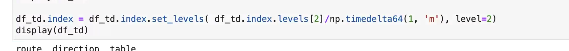

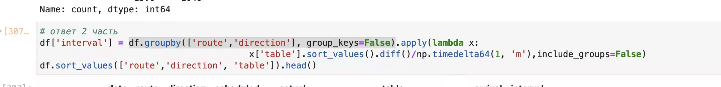


In [ ]:
### интьервал по расписанию в 0 минут - странная штучка. плохо

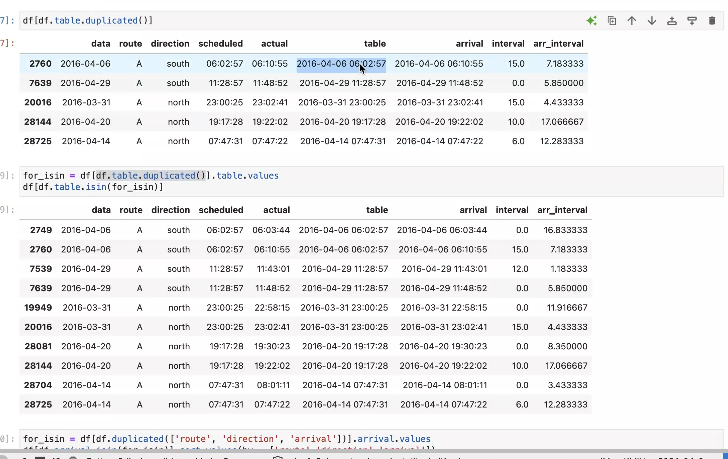

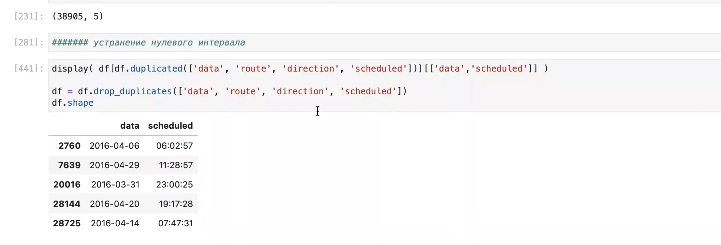

## Задание 5
Найдите время в минутах для опоздания авдобуса (+ задержка, - раньше расписания)

In [24]:
(df['arrival']-df['table']).map(s_f)

0        4.600000
1       -0.100000
2        4.833333
3        8.750000
4       -0.650000
           ...   
38900    4.633333
38901   -0.600000
38902    1.316667
38903    5.650000
38904    3.266667
Length: 38905, dtype: float64

In [25]:
df['late']=(df['arrival']-df['table']).map(s_f)

## Задание 6
1. Постройте максимально качественные гистограммы (или их аналоги) для разницы интервалов между автобусами для различных маршрутов и направлений.

2. Постройте максимально качественные гистограммы (или их аналоги) времени опоздания автобуса в зависимости от маршрута и направления.

   Увидели абсурд - возращаемся к началу и латаем код ;)

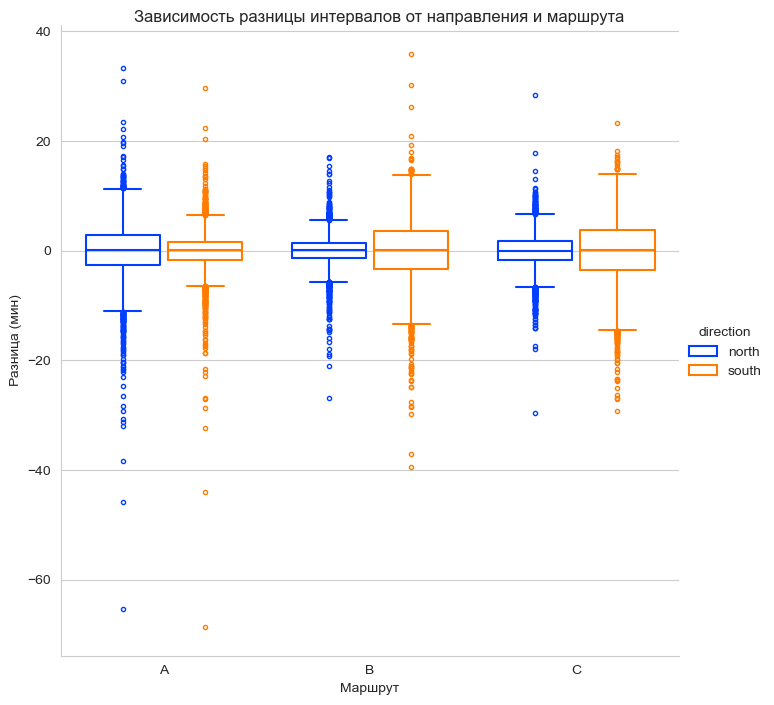

In [26]:
#1
sns.set_style('whitegrid')
sns.set_palette('bright')
ax1 = sns.catplot(data=df,x='route',hue='direction',y=df['inteval']-df['arr_inteval'],kind='box', gap=.1, fill=False, flierprops={ "markersize":3},height=7, aspect=1)
ax1.fig.suptitle('Зависимость разницы интервалов от направления и маршрута',y=1)
ax1.set(xlabel='Маршрут',ylabel='Разница (мин)')


plt.show()

In [27]:
display(df['data'].unique())
import holidays
holidays_2016 = pd.Series(holidays.US(years = [2016]))
holidays_2016
# cделали вывод, что наш данный нам промежуток не пересекается с каникулами

array(['2016-03-26', '2016-03-27', '2016-03-28', '2016-03-29',
       '2016-03-30', '2016-03-31', '2016-04-01', '2016-04-02',
       '2016-04-03', '2016-04-04', '2016-04-05', '2016-04-06',
       '2016-04-07', '2016-04-08', '2016-04-09', '2016-04-10',
       '2016-04-11', '2016-04-12', '2016-04-13', '2016-04-14',
       '2016-04-15', '2016-04-16', '2016-04-17', '2016-04-18',
       '2016-04-19', '2016-04-20', '2016-04-21', '2016-04-22',
       '2016-04-23', '2016-04-24', '2016-04-25', '2016-04-26',
       '2016-04-27', '2016-04-28', '2016-04-29', '2016-04-30',
       '2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
       '2016-05-05', '2016-05-06', '2016-05-07', '2016-05-08',
       '2016-05-09', '2016-05-10', '2016-05-11', '2016-05-12',
       '2016-05-13', '2016-05-14', '2016-05-15', '2016-05-16',
       '2016-05-17', '2016-05-18', '2016-05-19', '2016-05-20',
       '2016-05-21', '2016-05-22', '2016-05-23', '2016-05-24',
       '2016-05-25', '2016-05-26', '2016-05-27'], dtype

2016-01-01                New Year's Day
2016-05-30                  Memorial Day
2016-07-04              Independence Day
2016-09-05                     Labor Day
2016-11-11                  Veterans Day
2016-11-24                  Thanksgiving
2016-12-25                 Christmas Day
2016-12-26      Christmas Day (observed)
2016-01-18    Martin Luther King Jr. Day
2016-02-15         Washington's Birthday
2016-10-10                  Columbus Day
dtype: object

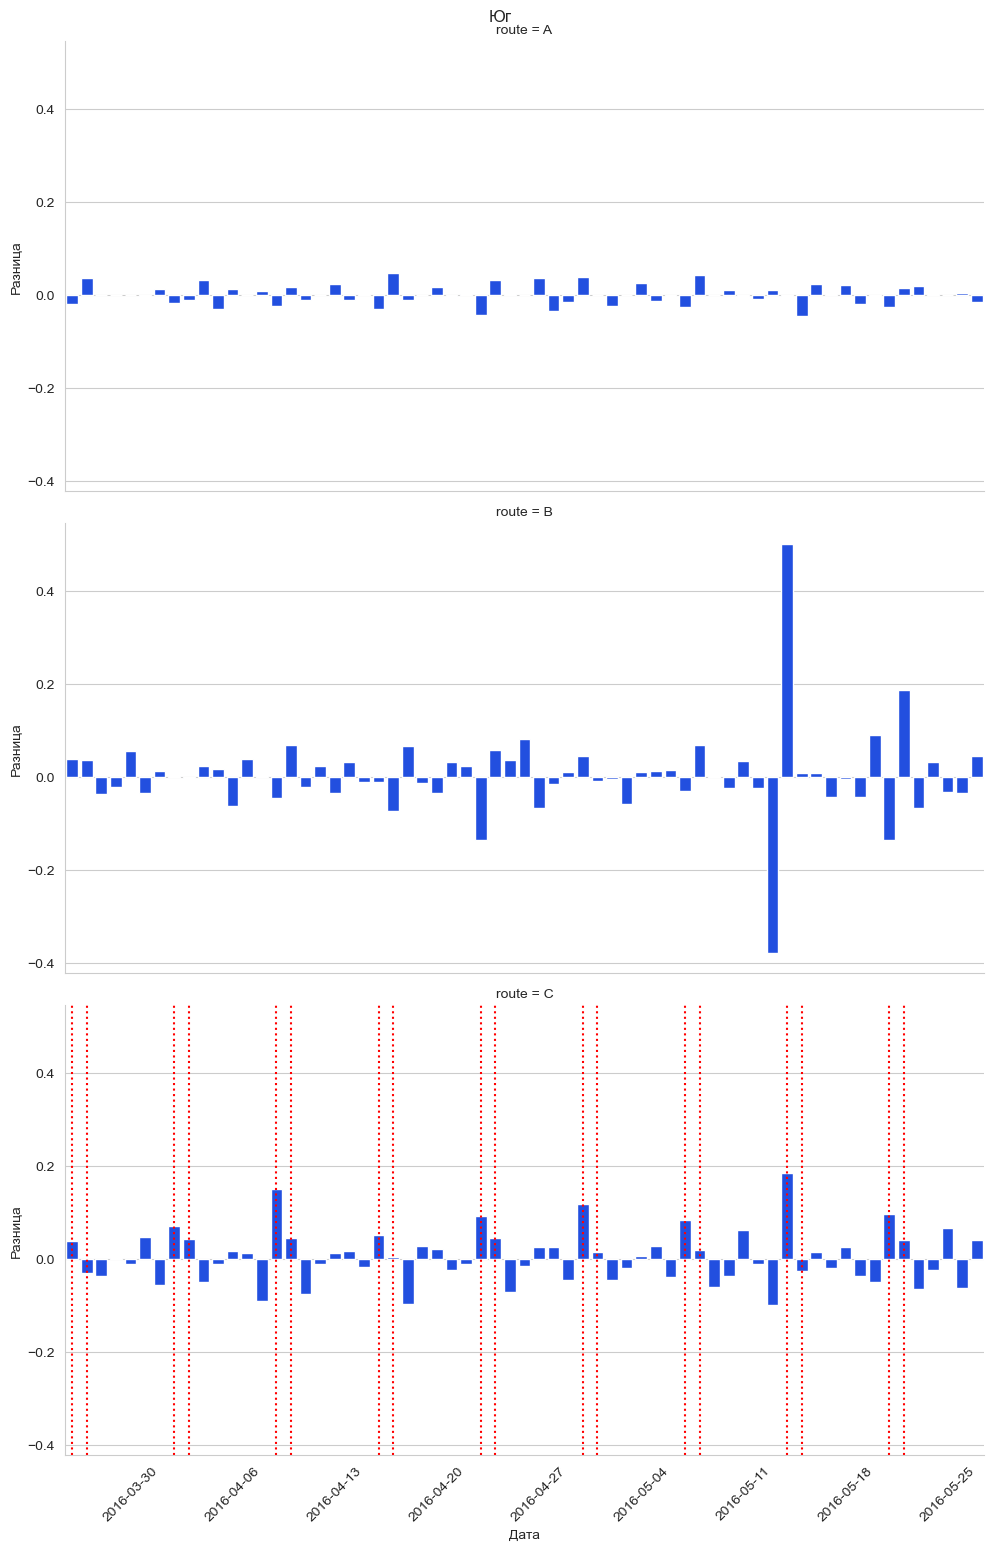

In [28]:
df['dif']=df['inteval']-df['arr_inteval']

g=sns.catplot(data=df.query('direction=="south"'),x='data',y='dif',errorbar=None,col='route',kind='bar',col_wrap=1,aspect=2).set(xlabel='Дата',ylabel='Разница')

[plt.axvline(vline, color ='red', linestyle= ':') for vline in pd.date_range(df['data'][0],df['data'][len(df['data'])-1],freq='W-SAT').astype(str)]
[plt.axvline(vline, color ='red', linestyle= ':') for vline in pd.date_range(df['data'][0],df['data'][len(df['data'])-1],freq='W-SUN').astype(str)]
plt.xticks(pd.date_range(df['data'][0],df['data'][len(df['data'])-1],freq='W-WED').astype(str),rotation=45)
g.fig.suptitle('Юг',y=1)
plt.show()

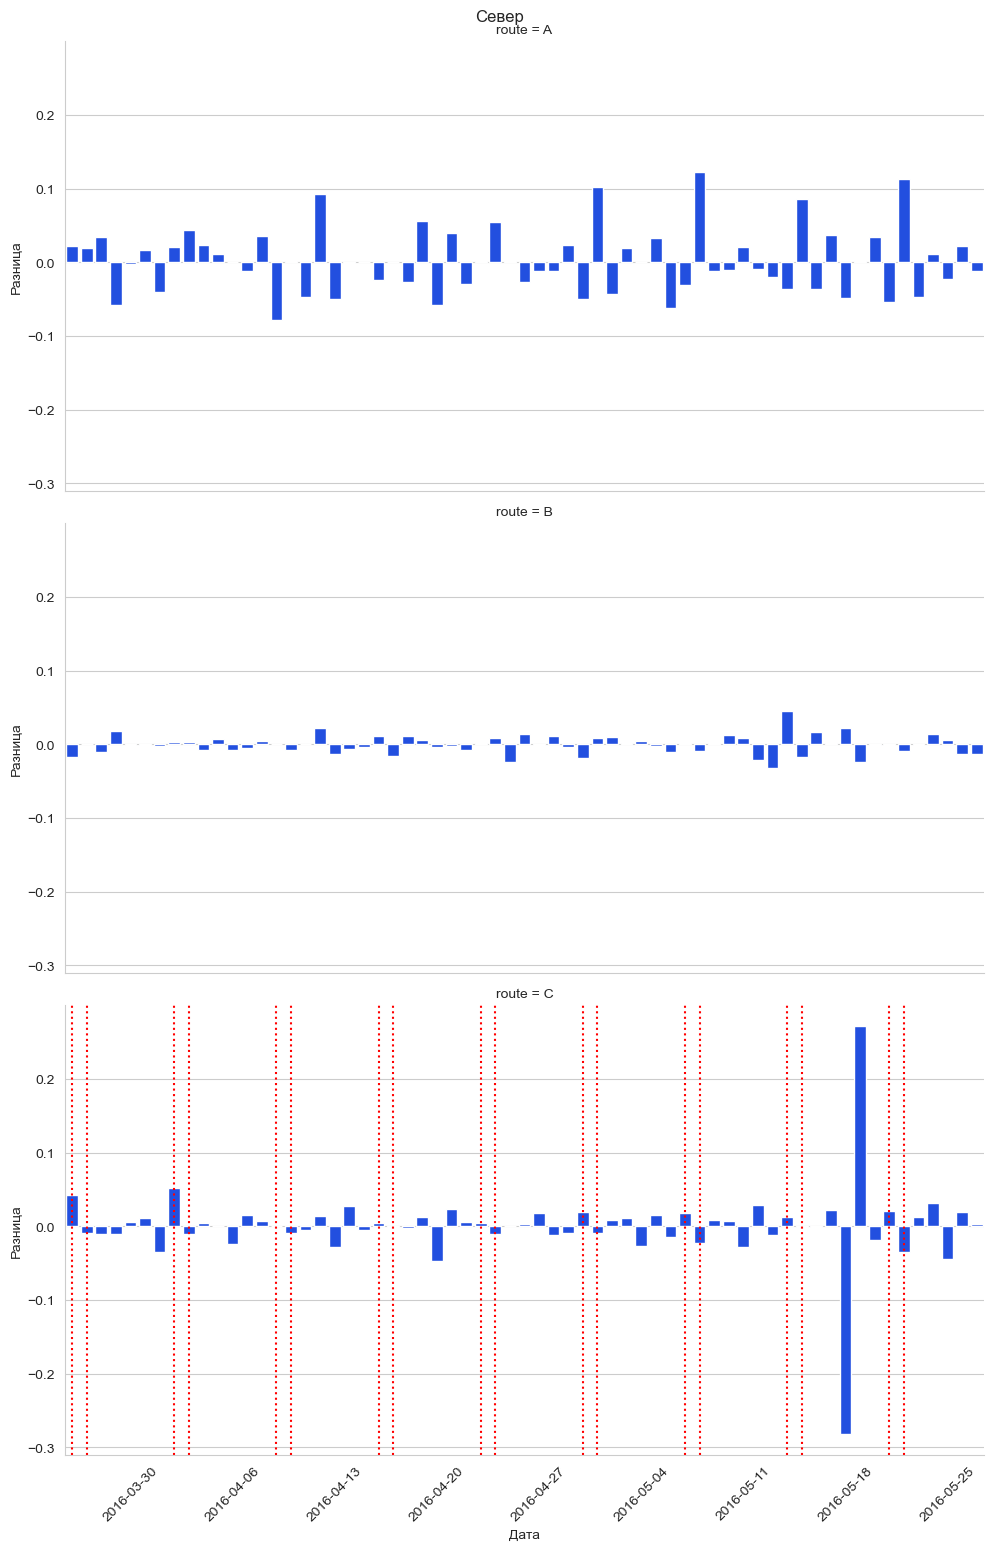

In [29]:
f=sns.catplot(data=df.query('direction=="north"'),x='data',y='dif',errorbar=None,col='route',kind='bar',col_wrap=1,aspect=2).set(xlabel='Дата',ylabel='Разница')

[plt.axvline(vline, color ='red', linestyle= ':') for vline in pd.date_range(df['data'][0],df['data'][len(df['data'])-1],freq='W-SAT').astype(str)]
[plt.axvline(vline, color ='red', linestyle= ':') for vline in pd.date_range(df['data'][0],df['data'][len(df['data'])-1],freq='W-SUN').astype(str)]
# выделила выходные
plt.xticks(pd.date_range(df['data'][0],df['data'][len(df['data'])-1],freq='W-WED').astype(str),rotation=45)
f.fig.suptitle('Север',y=1)
plt.show()

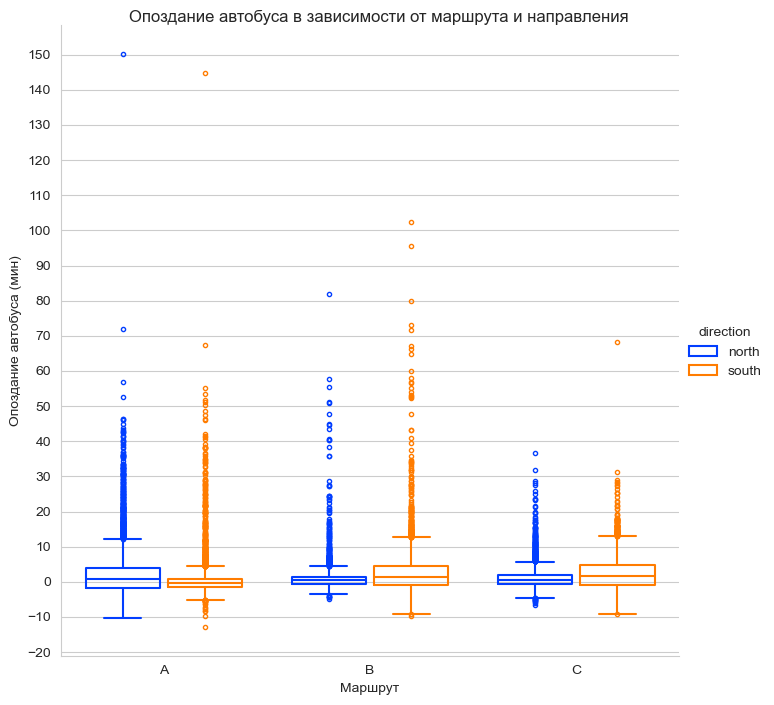

In [30]:
#2
# решила сделать боксплот
sns.set_style('whitegrid')
sns.set_palette('bright')
ax2 = sns.catplot(data=df,x='route',hue='direction',y='late',kind='box',fill=False, gap=.1, flierprops={ "markersize":3},height=7, aspect=1)
ax2.fig.suptitle('Опоздание автобуса в зависимости от маршрута и направления',y=1)
ax2.set(xlabel='Маршрут',ylabel='Опоздание автобуса (мин)')
plt.yticks(np.arange(-20,151,10))
plt.show()

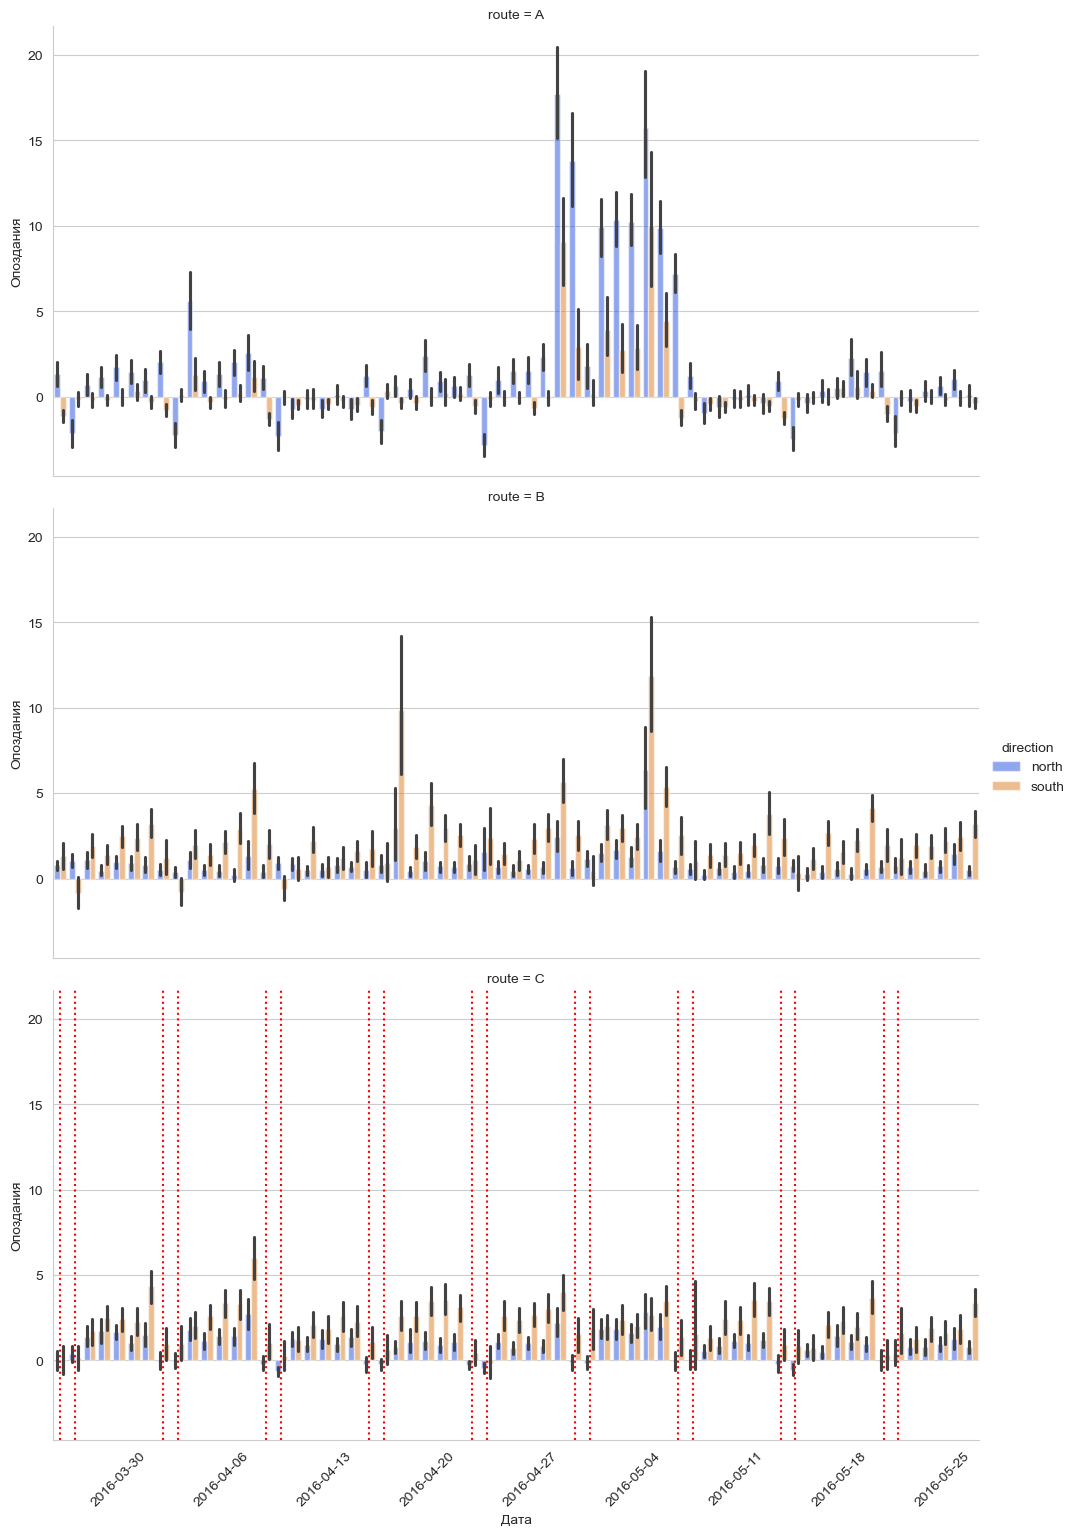

In [31]:

sns.catplot(data=df,x='data',hue='direction',y='late',kind='bar',col='route',col_wrap=1,aspect=2, alpha=0.5).set(xlabel='Дата',ylabel='Опоздания')
plt.xticks(pd.date_range(df['data'][0],df['data'][len(df['data'])-1],freq='W-WED').astype(str),rotation=45)
# выделила выходные
[plt.axvline(vline, color ='red', linestyle= ':') for vline in pd.date_range(df['data'][0],df['data'][len(df['data'])-1],freq='W-SAT').astype(str)]
[plt.axvline(vline, color ='red', linestyle= ':') for vline in pd.date_range(df['data'][0],df['data'][len(df['data'])-1],freq='W-SUN').astype(str)]
plt.show()

#### Можно, что либо сказать о маршрутах автобусов содержательно?

Из рисунков
1. Из боксплота 1 подзадания видно, что маршрут А и B имеют не самые четкие интервалы, то есть интервалы по расписания сильно отличаются от фактических интервалов (ориентир: выбросы)
2. Из боксплота 2 подзадания видно, что маршрут А имеет самые большие показатели по опазданию в обоих направлениях(на севере около 150, на юге около 145). Также автобус этого маршрута и направления юг имеет самый ранний приход среди всех (прибыл на больше, чем 10 минут раньше)
3. Из 1 боксплота видно, что у всех маршрутов по заданным направлениям медианна в разнице интервалов близка к 0, что является хорошим показателем
4. Из 2 боксплота видно, что у всех маршрутов по заданным направлениям медианна в опозданиях близка к 0, что является хорошим показателем
5. Из 2 боксплота видно, что автобусы чаще опаздывают, нежели прибывают во время
6. С имеет самые стабильные интервалы по сравнению с остальными в обоих направлениях, также интервал опоздания у него меньше, чем у остальных
7. Автобус А чаще не соблюдает расписание в направлении севера, нежели на юге. Остальные автобусы- наоборот. По поводу интервалов, все хуже их соблюдают на севере
8. 
Из барплотов (P.S. я только с помощью циклов знаю, как провести везде линии, а циклы зло. Так что только на последнем оставила( (решила не рисковать). Также убрала в 1 доверительный интервал, иначе не читаемо как-то)
1. Из барплота для 2 подзадания видно, что автобус маршрута С практические не опаздывает по двум направлениям в выходные, в отличие от рабоичх дней. Оосбенно видны опоздания перед выходными
2. Автобусы маршрута B имеют похожую тенденцию, что и С. Они особенно сильно опаздывают по направлению юга
3. А имеют такую же законмерность, однако в 5 месяце там произошел бум по опозданиям (в  том числе в выходные)
4. С интервалами ситуация обратная

In [ ]:
### содержания плохтие для него, он чет другое хотел. ну и пофиг + его один из графиков

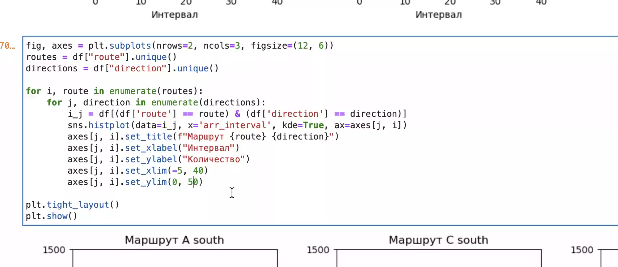

## Задание финальное ... для тех кто может
Давайте попробуем заполнить пропущенные данные в расписании  - `df_null`. Как это сделать правильно?

In [45]:
df_null0=df_null.copy()
df_null0['arrival'] = df_null0['data']+'/'+df_null0['actual']
df_null0['arrival']=pd.to_datetime(df_null0['arrival'])

#там в выходные наблюдается, что опоздания не очень большие (см выводы и рисунки) в 3 и 4 месяце - везде, в 5 меясце- везде, кроме А. Поэтому я думаю, что можно просто приравнять тут и статистика особо не пострадает
weekend=pd.DataFrame(pd.date_range('2016-03-28','2016-05-28',freq='B').astype(str))
df_null0=df_null0.merge(weekend,how='left',left_on='data',right_on=0)

df_null0[df_null0['data']!=df_null0[0]]
# все было бы хорошо, однако только видно, что почти все пропуски выходных это те самые шоки из А ,  о которых я говорила в задание 6
# это была идея, показавшаяся мне хорошей, однако я ее опровергла. На данный момент идея как сделать это корректно не возникла

,data,route,direction,scheduled,actual,arrival,0
45,2016-05-08,A,south,NaN,17:57:49,2016-05-08 17:57:49,NaN
46,2016-05-08,A,south,NaN,15:44:18,2016-05-08 15:44:18,NaN
47,2016-05-08,A,south,NaN,13:01:23,2016-05-08 13:01:23,NaN
48,2016-05-08,A,south,NaN,15:56:25,2016-05-08 15:56:25,NaN
49,2016-05-08,A,south,NaN,13:43:58,2016-05-08 13:43:58,NaN
50,2016-05-07,A,south,NaN,18:52:18,2016-05-07 18:52:18,NaN
51,2016-05-07,A,south,NaN,16:46:38,2016-05-07 16:46:38,NaN
52,2016-05-07,A,south,NaN,09:24:18,2016-05-07 09:24:18,NaN
53,2016-05-07,A,south,NaN,12:48:02,2016-05-07 12:48:02,NaN
70,2016-05-01,A,south,NaN,15:53:16,2016-05-01 15:53:16,NaN
